# 1. データの読み込みと確認

初めに使用するライブラリを読み込みます。numpy, pandas, sklearnはよく使用するので、ブックマークしておくと良いと思います。<br>
[numpy](https://numpy.org/doc/1.21/index.html#)
[pandas](https://pandas.pydata.org/docs/#)
[matplotlib](https://matplotlib.org/stable/index.html)
[sklearn](https://scikit-learn.org/stable/index.html)

In [1]:
# ライブラリの読み込み
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import ensemble
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing

# 不要な警告を無視する
import warnings
warnings.filterwarnings('ignore')

pandasのread_csv関数を用いて、分析する訓練データtrain.csvとテストデータtest.csvを読み込みます。<br>
[read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv)

In [2]:
# 学習用データ、テストデータ、提出サンプルデータの読み込み
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
sample = pd.read_csv('../input/gender_submission.csv')

データを見ていく上で、まず初めにデータのサイズを確認してみます。

In [3]:
# データサイズの確認
print('学習データのサイズ:', train.shape)
print('テストデータのサイズ:', test.shape)

学習データのサイズ: (891, 12)
テストデータのサイズ: (418, 11)


データの情報を確認します。<br>
[info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info)

In [4]:
# データの情報の確認
print(train.info(), '\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   P

学習データ、テストデータ、提出サンプルデータについて先頭の5行を表示します。

In [5]:
# 学習データの先頭5行を表示
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
# テストデータの先頭5行を表示
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [7]:
# 提出サンプルデータの先頭5行を表示
sample.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

学習用データを特徴量と目的変数に分けます。この際、特徴量には_x、目的変数には_yをつけました。目的変数は'Survived'です。テストデータには目的変数はなく特徴量だけなので分ける必要はないです。学習用データと同じようにテストデータには_xをつけました。<br>
[drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop)

In [8]:
# 学習用データを特徴量と目的変数に分ける
train_x = train.drop(['Survived'], axis=1)
train_y = train['Survived']

# テストデータは特徴量のみなのでそのままで良い
test_x = test.copy()

<AxesSubplot:xlabel='Survived', ylabel='count'>

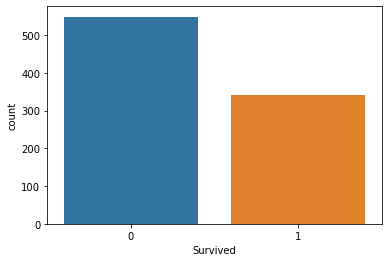

In [9]:
# 'Survived'の分布
sns.countplot(data=train, x='Survived')

# 2. 特徴量の作成

学習用データとテストデータの欠損値を確認します。train_x.isnull().sum()とすると、学習用データの特徴量ごとの欠損数を出力することができます。さらにtrain_x.isnull().sum().sort_values(ascending=False)を加えることで、欠損数が多い順に並び替えることができます。

In [10]:
#学習データの欠損値を確認する
print('訓練データの欠損値:\n', train_x.isnull().sum().sort_values(ascending=False), '\n')
#テストデータの欠損値を確認する
print('テストデータの欠損値:\n', test_x.isnull().sum().sort_values(ascending=False))

訓練データの欠損値:
 Cabin          687
Age            177
Embarked         2
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64 

テストデータの欠損値:
 Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64


'PassengerId'は乗客に番号を振っているだけであり、目的変数に影響を与えないため、削除します。

In [11]:
train_x = train_x.drop(['PassengerId'], axis=1)
test_x = test_x.drop(['PassengerId'], axis=1)

'Name', 'Ticket', 'Cabin'も上手く使えば予測に有用ですが、煩雑な処理
が必要そうなので、今回はこれらの変数を使わないことにします。

In [12]:
# 欠損値が多すぎる特徴量、予測に無関係と考えられる特徴量を削除する
drop_col = ['Name','Ticket', 'Cabin']
train_x = train_x.drop(drop_col, axis=1)
test_x = test_x.drop(drop_col, axis=1)

もう一度欠損数を確認します。

In [13]:
#学習データの欠損値を確認する
print('訓練データの欠損値:\n', train_x.isnull().sum().sort_values(ascending=False), '\n')
#テストデータの欠損値を確認する
print('テストデータの欠損値:\n', test_x.isnull().sum().sort_values(ascending=False))

訓練データの欠損値:
 Age         177
Embarked      2
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64 

テストデータの欠損値:
 Age         86
Fare         1
Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
dtype: int64


'Age', 'Embarked', 'Fare'は欠損値があるため補完します。'Age'は数値変数、'Embarked'はカテゴリ変数、'Fare'は数値変数です。数値変数であるAge, Fareは平均値、カテゴリ変数であるEmbarkedは最頻値で補完します。

<AxesSubplot:xlabel='Age', ylabel='Count'>

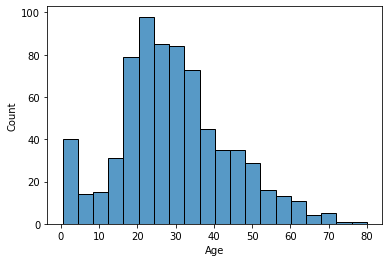

In [14]:
# 'Age'のヒストグラム
sns.histplot(data=train_x, x='Age')

In [15]:
# Ageカラムの欠損値を平均値で補完する
train_x['Age'] = train_x['Age'].fillna(train_x['Age'].mean())
test_x['Age'] = test_x['Age'].fillna(test_x['Age'].mean())

<AxesSubplot:xlabel='Embarked', ylabel='count'>

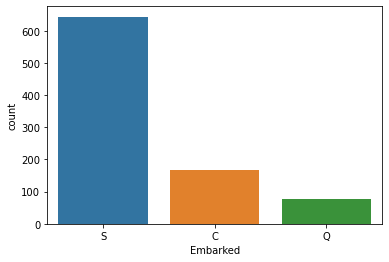

In [16]:
# 'Embarked'のカウントプロット
sns.countplot(data=train_x, x='Embarked')

In [17]:
# Embarkedカラムの欠損値を最頻値で補完する
train_x['Embarked'] = train_x['Embarked'].fillna('S')
test_x['Embarked'] = test_x['Embarked'].fillna('S')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

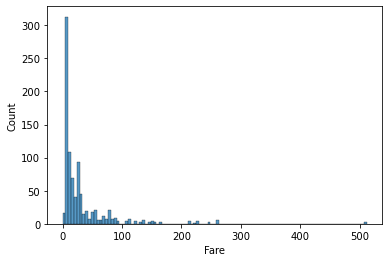

In [18]:
# 'Fare'のヒストグラム
sns.histplot(data=train_x, x='Fare')

In [19]:
# Fareカラムの欠損値を平均値で補完する
#print(train_x['Fare'].dtype)
train_x['Fare'] = train_x['Fare'].fillna(train_x['Fare'].mean())
test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].mean())

欠損値を全て補完したことを確認します。

In [20]:
# 欠損値を全て補完したことを確認する
print(train_x.isnull().sum(), '\n')
print(test_x.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64 

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


以上で欠損値の補完が完了しました。次はカテゴリ変数の変換をします。今回はラベルエンコーディングします。

In [21]:
# データの情報の確認
print(train_x.info(), '\n')
print(test_x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), 

Dtypeがobjectとなっている変数がカテゴリ変数です。したがって、'Sex'と'Embarked'についてラベルエンコーディングする必要があります。まずは'Sex'についてラベルエンコーディングします。'Sex'に含まれる水準を確認します。

In [22]:
print(train_x['Sex'].unique())
print(test_x['Sex'].unique())

['male' 'female']
['male' 'female']


'Sex'カラムにはmale, femaleが含まれることが分かりました。maleは0、femaleは1に変換したいと思います。

In [23]:
# 'Sex'をマッピング　male:0, female:1
sex_mapping = {"male":0, "female":1}
train_x["Sex"] = train_x["Sex"].map(sex_mapping)
test_x["Sex"] = test_x["Sex"].map(sex_mapping)

次に'Embarked'カラムについてラベルエンコーディングします。'Embarked'に含まれる水準を確認します。

In [24]:
print(train_x['Embarked'].unique())
print(test_x['Embarked'].unique())

['S' 'C' 'Q']
['Q' 'S' 'C']


'Embarked'カラムにはS, C, Qが含まれることがわかりました。Sは0、Cは1、Qは2に変換したいと思います。

In [25]:
# Embarkedをマッピング　S:0, C:1, Q:2
embarked_mapping = {'S':0, 'C':1, 'Q':2}
train_x['Embarked'] = train_x['Embarked'].map(embarked_mapping)
test_x['Embarked'] = test_x['Embarked'].map(embarked_mapping)

再びデータの情報を確認します。

In [26]:
# データの情報の確認
print(train_x.info(), '\n')
print(test_x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
mem

全ての変数を数値変数に変換できたことが分かります。最後に数値変数を標準化します。

In [27]:
# 標準化
scaler = preprocessing.StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# 3. モデリング

性能を評価するには、データの分割をする必要があります。今回は分類タスクなので、層化交差検証を用います。

In [28]:
# 分割方法の指定
skf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [29]:
# モデルの作成と評価(RidgeClassifier)
rc = linear_model.RidgeClassifier(random_state=0)
rc_results = model_selection.cross_validate(rc, train_x, train_y, scoring='accuracy', cv=skf)
rc_results['test_score'].mean()

0.7945828887075513

In [30]:
# モデルの作成と評価(RandomForestClassifier)
rfc = ensemble.RandomForestClassifier(random_state=0)
rfc_results = model_selection.cross_validate(rfc, train_x, train_y, scoring='accuracy', cv=skf)
rfc_results['test_score'].mean()

0.8102943945766116

In [31]:
# モデルの作成と評価 - チューニングあり(RandomForestClassifier)
# ハイパーパラメータ
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 2, 5],
}

tune_rfc = model_selection.GridSearchCV(rfc, param_grid=param_grid, scoring = 'accuracy', 
                                        cv = skf)
                                        
                                        
tune_rfc.fit(train_x, train_y)
print("最もよいパラメータ: ", tune_rfc.best_params_)
print("検証データの平均値: ", tune_rfc.cv_results_['mean_test_score'][tune_rfc.best_index_])

最もよいパラメータ:  {'max_depth': 5, 'n_estimators': 50}
検証データの平均値:  0.8215177954930638


In [32]:
tune_rfc.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=0)

# 4. 提出物の作成

In [33]:
# 学習データ全体でモデルの学習をする
tune_rfc.best_estimator_.fit(train_x, train_y)

# テストデータに対して予測する
predict = tune_rfc.best_estimator_.predict(test_x)

In [34]:
# 提出用ファイルの作成
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predict})
submit.to_csv('../output/submit_1.csv', index=False)